# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 116MB/s] 


## Importing Libraries

In [2]:
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib seaborn
!pip install scikit-learn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [4]:
df=pd.read_csv('Bus_Breakdown_and_Delays.csv')
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [5]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [6]:
df.shape

(147972, 21)

In [7]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [8]:
df.dropna(axis=1, inplace=True)

In [9]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Bus_No,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Bus_Company_Name,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Bus_No                           147972 non-null  object
 3   Schools_Serviced                 147972 non-null  object
 4   Occurred_On                      147972 non-null  object
 5   Created_On                       147972 non-null  object
 6   Bus_Company_Name                 147972 non-null  object
 7   Number_Of_Students_On_The_Bus    147972 non-null  int64 
 8   Has_Contractor_Notified_Schools  147972 non-null  object
 9   Has_Contractor_Notified_Parents  147972 non-null  object
 10  Have_You_Alerted_OPT             147972 non-null  object
 11  Informed_On                      147972 non-null  object
 12  Last_Updated_On 

In [11]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Bus_No,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Bus_Company_Name,object
Number_Of_Students_On_The_Bus,int64
Has_Contractor_Notified_Schools,object
Has_Contractor_Notified_Parents,object


In [12]:
df.describe

<bound method NDFrame.describe of        School_Year  Busbreakdown_ID  Bus_No Schools_Serviced  \
0        2015-2016          1224901     811             C353   
1        2015-2016          1225098    9302             C814   
2        2015-2016          1215800     358             C195   
3        2015-2016          1215511     331             C178   
4        2015-2016          1215828     332             S176   
...            ...              ...     ...              ...   
147967   2016-2017          1338452    9345             C530   
147968   2016-2017          1341521    0001             C579   
147969   2016-2017          1353044  GC0112            09003   
147970   2016-2017          1353045   5525D            24457   
147971   2016-2017          1353046    2530            21436   

                   Occurred_On              Created_On  \
0       10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM   
1       10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM   
2       09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM   
3       09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM   
4       09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM   
...                        ...                     ...   
147967  04/05/2017 08:00:00 AM  04/05/2017 08:10:00 AM   
147968  04/24/2017 07:42:00 AM  04/24/2017 07:44:00 AM   
147969  05/25/2017 04:22:00 PM  05/25/2017 04:28:00 PM   
147970  05/25/2017 04:27:00 PM  05/25/2017 04:30:00 PM   
147971  05/25/2017 04:36:00 PM  05/25/2017 04:37:00 PM   

                 Bus_Company_Name  Number_Of_Students_On_The_Bus  \
0                    G.V.C., LTD.                              5   
1                    G.V.C., LTD.                              3   
2                    G.V.C., LTD.                             12   
3                    G.V.C., LTD.                             11   
4                    G.V.C., LTD.                             12   
...                           ...                            ...   
147967               G.V.C., LTD.                              7   
147968               G.V.C., LTD.                              0   
147969        G.V.C. LTD. (B2192)                              0   
147970  LITTLE RICHIE BUS SERVICE                              0   
147971  RELIANT TRANS, INC. (B232                              7   

       Has_Contractor_Notified_Schools Has_Contractor_Notified_Parents  \
0                                  Yes                             Yes   
1                                  Yes                             Yes   
2                                  Yes                             Yes   
3                                  Yes                             Yes   
4                                  Yes                             Yes   
...                                ...                             ...   
147967                             Yes                             Yes   
147968                             Yes                             Yes   
147969                             Yes                             Yes   
147970                             Yes                             Yes   
147971                             Yes                             Yes   

       Have_You_Alerted_OPT             Informed_On         Last_Updated_On  \
0                        No  10/26/2015 08:40:00 AM  10/26/2015 08:40:39 AM   
1                        No  10/27/2015 07:11:00 AM  10/27/2015 07:11:22 AM   
2                       Yes  09/18/2015 07:38:00 AM  09/18/2015 07:38:44 AM   
3                       Yes  09/17/2015 08:12:00 AM  09/17/2015 08:12:08 AM   
4                        No  09/18/2015 07:45:00 AM  09/18/2015 07:56:40 AM   
...                     ...                     ...                     ...   
147967                   No  04/05/2017 08:10:00 AM  04/05/2017 08:10:15 AM   
147968                   No  04/24/2017 07:44:00 AM  04/24/2017 07:44:15 AM   
147969                  Yes  05/25/2017 04:28:00 PM  05/25/2017 04:34:36 PM   
1479

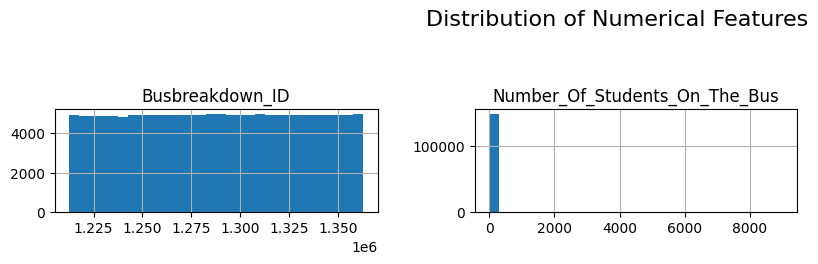

In [13]:
df.hist(bins=30, figsize=(15, 10), layout=(int(len(df.columns) / 3) + 1, 3))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

In [14]:
categorical_features = df.select_dtypes(include=['object']).columns

for column in categorical_features:
    print(f"Frequency count for {column}:")
    print(df[column].value_counts())
    print("\n")

Frequency count for School_Year:
School_Year
2016-2017    83141
2015-2016    63184
2017-2018     1646
2019-2020        1
Name: count, dtype: int64


Frequency count for Bus_No:
Bus_No
9354     468
357      465
9302     434
118      357
9320     349
        ... 
20133      1
1140D      1
553D       1
160D       1
K9345      1
Name: count, Length: 10765, dtype: int64


Frequency count for Schools_Serviced:
Schools_Serviced
C814                                 1735
C073                                 1498
C195                                  905
12084                                 877
C579                                  852
                                     ... 
02419, 02793, 02986                     1
30148,30901                             1
04146, 04877, 04678, 04404, 04206       1
10086,10307                             1
04377, 04454, 04658                     1
Name: count, Length: 5180, dtype: int64


Frequency count for Occurred_On:
Occurred_On
01/25/2016 07:30:00 AM    

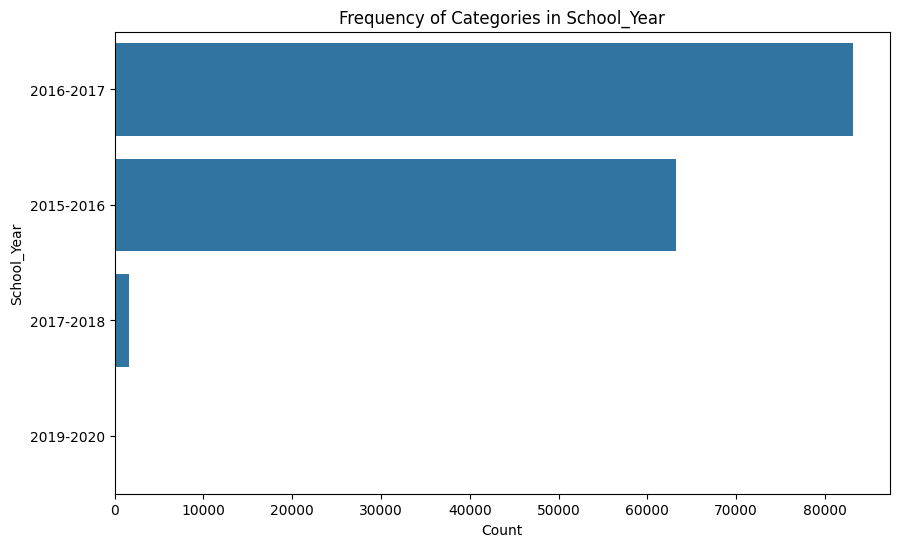

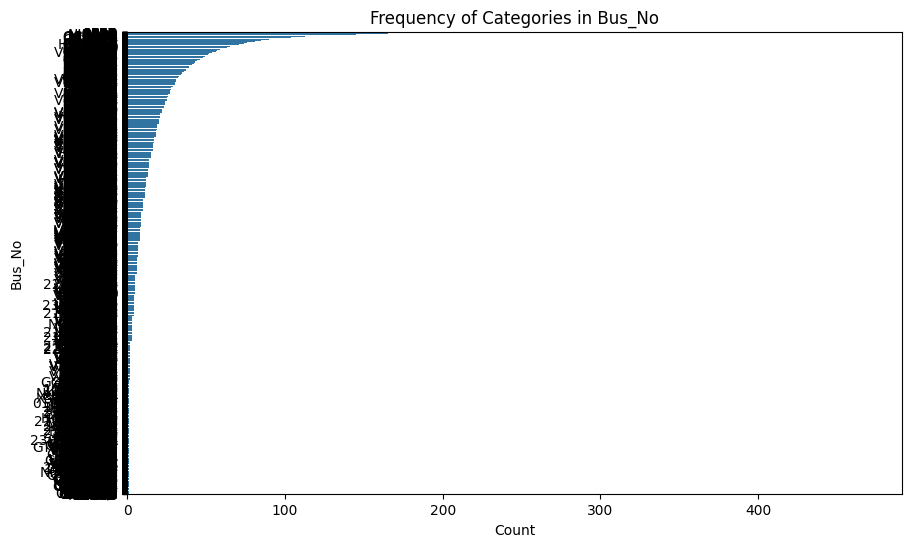

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


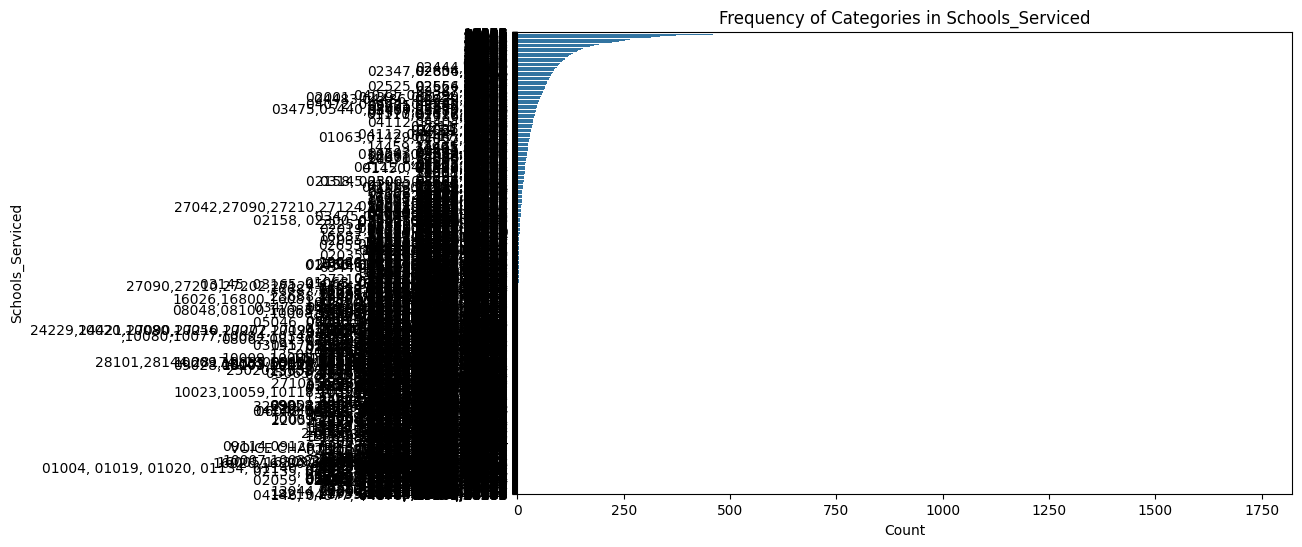

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Frequency of Categories in {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoders = {}
for column in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

In [ ]:
correlation_matrix = df_encoded.corr()
correlation_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
df=pd.read_csv('Bus_Breakdown_and_Delays.csv')
df

In [ ]:
import pandas as pd

df_one_hot = pd.get_dummies(df, columns=['Breakdown_or_Running_Late'])
df_one_hot = pd.get_dummies(df, columns=['Occurred_On'])

df_one_hot

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
le = LabelEncoder()

df['Breakdown_or_Running_Late'] = le.fit_transform(df['Breakdown_or_Running_Late'])

In [ ]:
le = LabelEncoder()

df['Occurred_On'] = le.fit_transform(df['Occurred_On'])

In [ ]:
df.head()

In [ ]:
scaler = StandardScaler()

df_standardized = df.copy()
df_standardized[['Breakdown_or_Running_Late', 'Occurred_On']] = scaler.fit_transform(df[['Breakdown_or_Running_Late', 'Occurred_On']])


In [ ]:
df['Type_of_seasons'] = df['Occurred_On'].apply(get_season)

print(df)


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1, n_samples=1000, random_state=42)

print("Original data", Counter(y))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Data after repetition", Counter(y_resampled))

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
X= df["Breakdown_or_Running_Late"]
y= df["Occurred_On"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
model = Sequential()

model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2,
                    verbose=1)

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
df= scaler.transform(new_data)

predictions = model.predict(df)

predictions_binary = (predictions > 0.5).astype(int)

print(predictions_binary)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2,
                    verbose=1)

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)

plt.tight_layout()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('my_trained_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- I applied one-hot encoding to ensure each category was treated distinctly without implying any order. These encoding techniques were essential for making the categorical data compatible with the model, ultimately improving its ability to learn patterns and make accurate predictions.

3- I chose a batch size of 10 to balance the need for more frequent weight updates with the computational efficiency of processing smaller batches. This size allowed the model to learn effectively from the data while keeping training time manageable. I set the number of epochs to 50, providing enough cycles for the model to converge without overfitting. For the optimizer, I selected Adam due to its adaptive learning rate, which is well-suited for a wide range of problems and typically leads to faster convergence.

4- I chose the categorical cross-entropy loss function because it is well-suited for multi-class classification tasks

5- I implemented dropout as a regularization technique to prevent overfitting in the model. Dropout works by randomly deactivating a fraction of neurons during training


6- I evaluated the model using loss and accuracy to comprehensively assess its performance. The loss metric indicates how well the model's predictions align with the actual labels, with lower values reflecting better predictive accuracy.

7- I focused on adjusting hyperparameters such as batch size, number of epochs, and optimizer settings to enhance the model's performance.

8-  I monitored the training and validation loss and accuracy throughout the training process. If the model showed high accuracy on the training set but significantly lower accuracy on the validation set
